In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
import timeit as t

In [4]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]
         
data = load_iris()
x_data = data.data
y_data = data.target
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 99)
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print(name)
    print('Results-->')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy is:" + str(acc))
    train_predictions = clf.predict_proba(x_test)
    log_entry = pd.DataFrame([[name, acc*100]], columns=["Classifier", "Accuracy"])
    print("="*30)

KNeighborsClassifier
Results-->
Accuracy is:0.9333333333333333
DecisionTreeClassifier
Results-->
Accuracy is:0.9333333333333333
RandomForestClassifier
Results-->
Accuracy is:0.9333333333333333
AdaBoostClassifier
Results-->
Accuracy is:0.9333333333333333
GradientBoostingClassifier
Results-->
Accuracy is:0.9333333333333333
GaussianNB
Results-->
Accuracy is:0.9333333333333333


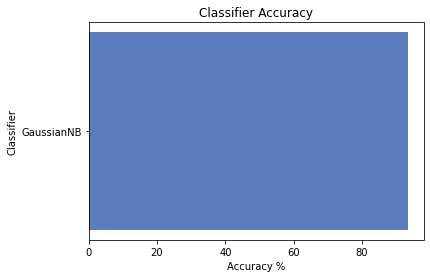

In [5]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log_entry, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()